# 배치 정규화 (Batch Normalization)

**배치 정규화(Batch Normalization)**는 심층 신경망(Deep Neural Networks)의 각 층(layer)에 들어가는 입력값의 분포를 재조정하여 학습 과정을 안정화하고 속도를 높이는 기법임.
신경망이 깊어질수록 이전 층의 파라미터 변화로 인해 각 층의 입력 데이터 분포가 계속 바뀌는 **내부 공변량 변화(Internal Covariate Shift)** 문제가 발생하는데, 배치 정규화는 이를 완화함. 결과적으로 더 높은 학습률(learning rate)을 사용할 수 있게 하고, 가중치 초기화에 대한 민감도를 줄여주며, 규제(regularization)와 유사한 효과를 내기도 함.

### 📐 수학적 배경 (Mathematical Background)
배치 정규화는 미니배치(mini-batch) 단위로 데이터의 평균과 분산을 계산하여 정규화를 수행함. 이후, 학습 가능한 파라미터인 감마(gamma, `$\gamma$`)와 베타(beta, `$\beta$`)를 이용해 스케일 및 이동 변환을 적용하여 네트워크의 표현력을 유지함.

1. **미니배치 평균 계산:**
   $$ \mu_B = \frac{1}{m} \sum_{i=1}^{m} x_i $$

2. **미니배치 분산 계산:**
   $$ \sigma_B^2 = \frac{1}{m} \sum_{i=1}^{m} (x_i - \mu_B)^2 $$

3. **정규화:**
   $$ \hat{x}_i = \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}} $$
   (여기서 `$\epsilon$`은 분모가 0이 되는 것을 방지하기 위한 작은 상수)

4. **스케일 및 이동(Scale and Shift):**
   $$ y_i = \gamma \hat{x}_i + \beta $$

In [1]:
# !pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

### 예제 데이터 준비 (Data Preparation)
평균이 5이고 표준편차가 3인 정규분포를 따르는 가상의 활성화 출력을 생성함. 이는 정규화되지 않은 데이터 분포를 시뮬레이션하기 위함.

In [2]:
# 가상의 미니배치 데이터 생성 (활성화 함수의 출력이라고 가정)
np.random.seed(42)
batch_size = 100
feature_dim = 1
X = np.random.randn(batch_size, feature_dim) * 3 + 5  # 평균 5, 표준편차 3

print(f"데이터 형태 (shape): {X.shape}")
print(f"데이터 처음 5개:\n{X[:5]}")
print(f"\n원본 데이터 평균: {X.mean():.4f}")
print(f"원본 데이터 분산: {X.var():.4f}")

데이터 형태 (shape): (100, 1)
데이터 처음 5개:
[[6.49014246]
 [4.5852071 ]
 [6.94306561]
 [9.56908957]
 [4.29753988]]

원본 데이터 평균: 4.6885
원본 데이터 분산: 7.3487


### 핵심 로직 구현 (Code Implementation)
배치 정규화 과정을 NumPy를 사용하여 단계별로 구현함. 평균과 분산 계산, 정규화, 그리고 스케일 및 이동 변환을 순서대로 적용함.

In [3]:
def batch_normalization_forward(X, gamma, beta, epsilon=1e-5):
    # 1. 미니배치 평균 계산
    mu = np.mean(X, axis=0)
    print(f"미니배치 평균 (mu): {mu.item():.4f}")

    # 2. 미니배치 분산 계산
    var = np.var(X, axis=0)
    print(f"미니배치 분산 (var): {var.item():.4f}")

    # 3. 정규화
    X_hat = (X - mu) / np.sqrt(var + epsilon)
    print(f"\n정규화된 데이터 평균: {X_hat.mean():.4f}")
    print(f"정규화된 데이터 분산: {X_hat.var():.4f}")

    # 4. 스케일 및 이동
    out = gamma * X_hat + beta
    print(f"\n최종 출력 데이터 평균: {out.mean():.4f}")
    print(f"최종 출력 데이터 분산: {out.var():.4f}")

    return out, X_hat, mu, var

# 학습될 파라미터 gamma와 beta 초기화 (보통 1과 0으로 시작)
gamma = np.ones((1, feature_dim))
beta = np.zeros((1, feature_dim))

print("---배치 정규화 시작---")
BN_output, _, _, _ = batch_normalization_forward(X, gamma, beta)
print("---배치 정규화 종료---")

---배치 정규화 시작---
미니배치 평균 (mu): 4.6885
미니배치 분산 (var): 7.3487

정규화된 데이터 평균: -0.0000
정규화된 데이터 분산: 1.0000

최종 출력 데이터 평균: -0.0000
최종 출력 데이터 분산: 1.0000
---배치 정규화 종료---


### 📊 결과 확인 및 시각화 (Results & Visualization)
원본 데이터와 배치 정규화를 거친 데이터의 분포를 히스토그램으로 시각화하여 비교함. 정규화 후 데이터 분포가 평균 0, 표준편차 1에 가깝게 변환된 것을 확인할 수 있음.

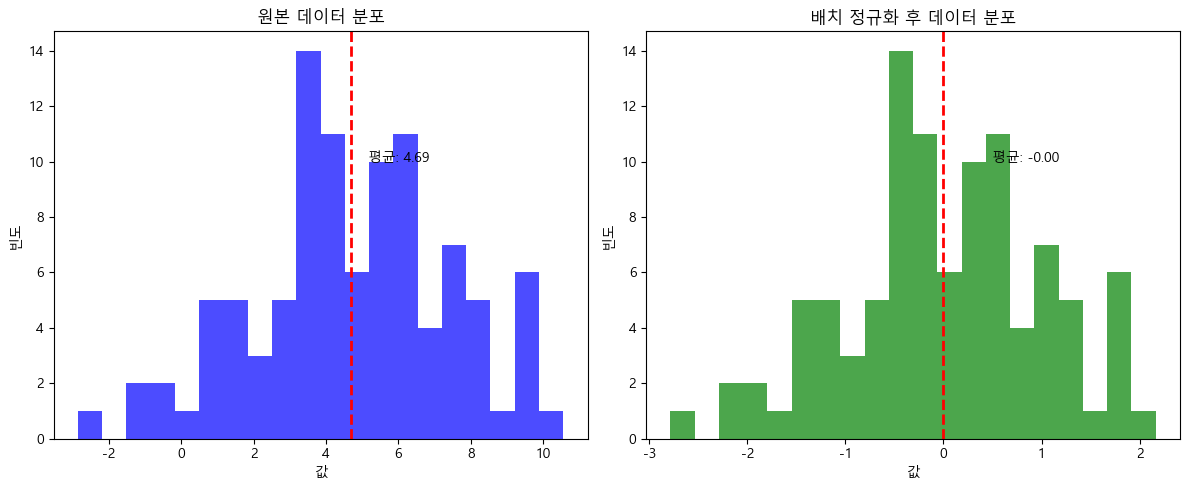

In [4]:
plt.figure(figsize=(12, 5))
plt.rc('font', family='Malgun Gothic') # 한글 폰트 설정
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지

# 원본 데이터 분포
plt.subplot(1, 2, 1)
plt.hist(X, bins=20, color='blue', alpha=0.7)
plt.title('원본 데이터 분포')
plt.xlabel('값')
plt.ylabel('빈도')
plt.axvline(X.mean(), color='red', linestyle='dashed', linewidth=2)
plt.text(X.mean()*1.1, 10, f'평균: {X.mean():.2f}')

# 배치 정규화 후 데이터 분포
plt.subplot(1, 2, 2)
plt.hist(BN_output, bins=20, color='green', alpha=0.7)
plt.title('배치 정규화 후 데이터 분포')
plt.xlabel('값')
plt.ylabel('빈도')
plt.axvline(BN_output.mean(), color='red', linestyle='dashed', linewidth=2)
plt.text(BN_output.mean()*1.1 + 0.5, 10, f'평균: {BN_output.mean():.2f}')

plt.tight_layout()
plt.show()

### 고려사항 (Considerations)
- **학습(Training)과 추론(Inference)의 차이:** 학습 시에는 미니배치의 평균과 분산을 사용하지만, 추론 시에는 단일 데이터에 대한 정규화가 필요함. 따라서 학습 과정 동안 전체 데이터의 평균과 분산에 대한 이동 평균(moving average)을 계산해두고, 추론 시에는 이 값을 사용하여 정규화를 수행함.
- **배치 크기(Batch Size) 의존성:** 배치 정규화는 미니배치의 통계량에 의존하므로, 배치 크기가 너무 작으면 통계량이 불안정해져 학습에 부정적인 영향을 줄 수 있음.

### 최종 요약 (Conclusion)
배치 정규화는 각 층의 입력 분포를 평균 0, 분산 1에 가깝게 정규화하고, 학습 가능한 파라미터 `$\gamma$`와 `$\beta$`를 통해 스케일과 이동을 조절하는 기법임. 이를 통해 내부 공변량 변화 문제를 해결하여 학습을 안정시키고, 더 빠르고 견고한 심층 신경망을 구축하는 데 핵심적인 역할을 함.